# DEEP LEARNING APPROACH

WHAT IS DEEP LEARNING ? 

Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example.In deep learning, a computer model learns to perform classification tasks directly from images, text, or sound. Deep learning models can achieve state-of-the-art accuracy, sometimes exceeding human-level performance. Models are trained by using a large set of labeled data and neural network architectures that contain many layers.

The term “deep” usually refers to the number of hidden layers in the neural network. Traditional neural networks only contain 2-3 hidden layers, while deep networks can have as many as 150.

Deep learning models are trained by using large sets of labeled data and neural network architectures that learn features directly from the data without the need for manual feature extraction.

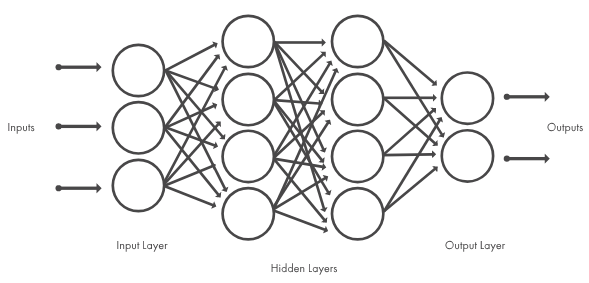

In [1]:
#import all the Libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

#TensorFlow is an open source software library for high performance numerical computation.Its flexible architecture allows easy deployment of computation 
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

C:\Users\vinay\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataframe1 = pd.read_csv('uber_30day.csv')
dataframe2 = pd.read_csv('lyft_30day.csv')

In [3]:
dataframe1.head()

,date_time,date,day,uber_distance,uber_duration,uber_estimate,uber_high_estimate,uber_low_estimate,main_temp,time,weather,uber_price_per_second
0,2018-03-01 00:00:03,1-Mar-18,Thursday,1.73,360,7.5,9.0,6.0,46.69,0:00:03,Rain,0.020833
1,2018-03-01 00:01:03,1-Mar-18,Thursday,1.90,480,5.5,7.0,4.0,46.69,0:01:03,Rain,0.011458
2,2018-03-01 00:02:03,1-Mar-18,Thursday,2.26,420,7.0,9.0,5.0,46.56,0:02:03,Rain,0.016667
3,2018-03-01 00:03:02,1-Mar-18,Thursday,1.63,360,7.5,9.0,6.0,46.56,0:03:02,Rain,0.020833
4,2018-03-01 00:04:02,1-Mar-18,Thursday,2.17,480,9.5,11.0,8.0,46.56,0:04:02,Rain,0.019792


In [4]:
dataframe2.head()

,date_time,date,day,lyft_distance,lyft_duration,time,lyft_max_estimate,lyft_min_estimate,lyft_estimate,lyft_price_per_second
0,2018-03-01 00:00:03,1-Mar-18,Thursday,1.76,414,0:00:03,3.40,3.40,3.40,0.008213
1,2018-03-01 00:01:03,1-Mar-18,Thursday,1.79,537,0:01:03,3.53,3.53,3.53,0.006574
2,2018-03-01 00:02:03,1-Mar-18,Thursday,2.20,487,0:02:03,3.85,3.85,3.85,0.007906
3,2018-03-01 00:03:02,1-Mar-18,Thursday,1.70,472,0:03:02,3.46,3.46,3.46,0.007331
4,2018-03-01 00:04:02,1-Mar-18,Thursday,2.21,553,0:04:02,3.47,3.47,3.47,0.006275


In [5]:
dataframe1.shape

(44434, 12)

- Next we Convert data into array that can be broken up into training "batches" that we feed into our RNN model.
- We have 44434 total observations in our data.For each of our batch inputs we give the same no of observations.
- Training data set is made up of 444 batches, containing about 100 observations. Each observation is a sequence of a single value.



- Batches – While training a neural network, instead of sending the entire input in one go, we divide in input into several chunks of equal size randomly. Training the data on batches makes the model more generalized as compared to the model built when the entire data set is fed to the network in one go.

In [6]:
traindata = np.array(dataframe1['uber_price_per_second'])
number_periods = 100
forecast_horizon = 1 
# To get the X data and reshaping 
x_data = traindata[:(len(traindata)-(len(traindata) % number_periods))]
x_batches = x_data.reshape(-1, 100, 1) 
# To get the Y data and reshaping 
y_data = traindata[1:(len(traindata)-(len(traindata) % number_periods)) + forecast_horizon]
y_batches = y_data.reshape(-1, 100, 1) 

In [7]:
def testdata(series, forecast, num_periods):
    test_x_setup = traindata[-(number_periods + forecast):] # setting up x test
    testX = test_x_setup[:number_periods].reshape(-1, 100, 1) # reshaping our test sets
    testY = traindata[-(number_periods):].reshape(-1, 100, 1)
    return testX, testY

X_test, Y_test = testdata(traindata, forecast_horizon, number_periods)

### USING TENSORFLOW MODEL TO TRAIN DATA - Using Recurrent Neural Networks

- RNNs can be used for mapping inputs to outputs of varying types, lengths and are fairly generalized in their application. 
- It is bascially applying input to the hidden layer. At all the time steps weights of the recurrent neuron would be the same.
- So a recurrent neuron stores the state of a previous input and combines with the current input thereby preserving some relationship of the current input with the previous input.

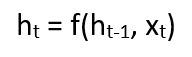

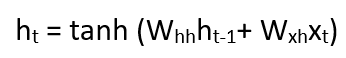

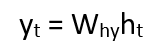

- A single time step of the input is supplied to the network i.e. xt is supplied to the network
- We then calculate its current state using a combination of the current input and the previous state i.e. we calculate ht
- The current ht becomes ht-1 for the next time step
- We can go as many time steps as the problem demands and combine the information from all the previous states
- Once all the time steps are completed the final current state is used to calculate the output yt
- The output is then compared to the actual output and the error is generated
- The error is then backpropagated to the network to update the weights and the network is trained

Back propagation in a Recurrent Neural Network(BPTT)
- In case of a forward propagation, the inputs enter and move forward at each time step. In case of a backward propagation, we are figuratively going back in time to change the weights, hence we call it the Back propagation through time(BPTT).

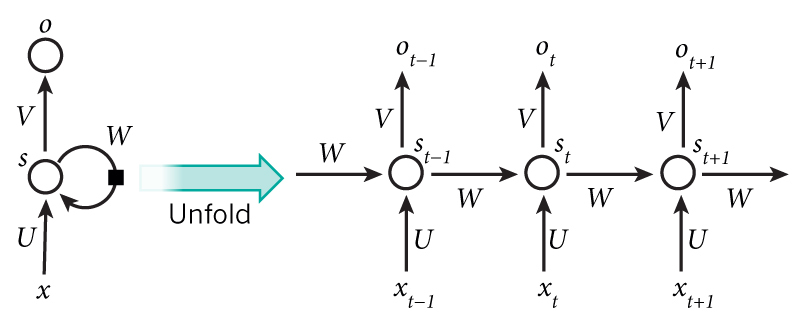

- The above diagram shows a RNN being unrolled into a full network. By unrolling we simply mean that we write out the network for the complete sequence. For example, if the sequence we care about is a sentence of 5 words, the network would be unrolled into a 5-layer neural network, one layer for each word. 
- The formulas that govern the computation happening in a RNN are as follows:

- x_t is the input at time step t. For example, x_1 could be a one-hot vector corresponding to the second word of a sentence.
- s_t is the hidden state at time step t. It’s the “memory” of the network. s_t is calculated based on the previous hidden state and the input at the current step: s_t=f(Ux_t + Ws_{t-1}).
- The function f usually is a nonlinearity such as tanh or ReLU. 
- s_{-1}, which is required to calculate the first hidden state, is typically initialized to all zeroes.
- o_t is the output at step t. For example, if we wanted to predict the next word in a sentence it would be a vector of probabilities across our vocabulary. o_t = {softmax}(Vs_t).

ACTIVATION FUNCTION 
- Activation Function – Once the linear component is applied to the input, a non-linear function is applied to it. 
- This is done by applying the activation function to the linear combination.
- The activation function translates the input signals to output signals.
- The output after application of the activation function would look something like f(a*W1+b) where f() is the activation function.

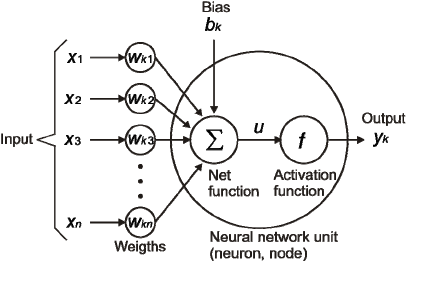

- In the below diagram we have “n” inputs given as X1 to Xn and corresponding weights Wk1 to Wkn. 
- We have a bias given as bk. The weights are first multiplied to its corresponding input and are then added together along with the bias. Let this be called as u.
- u=∑w*x+b
- The activation function is applied to u i.e. f(u) and we receive the final output from the neuron as yk = f(u)

# Testing using different Activation Functions and Optimizers

- Next we are specifying the number of periods we are using to predict that is the number of sequences that we are feeding into the model as a single input.
- We initialize a type of RNN cell to use (size 500) and the a type of activation function. 
- we expect the outputs to be in the same format as our inputs so we can compare our results using the loss function.
- we are using mean squared error (MSE), since this is a regression problem, where in our goal is to minimize the difference between the actual and the predicted. 
- Next we define the training operation in TensorFlow that will optimize our network of input and outputs. To execute the optimization, we will use the Adam optimizer.

# # 1. Using Adam optimizer and Sigmoid activation function 

- AdamOptimizer: Adaptive Moment Estimation (Adam) keeps separate learning rates for each weight as well as an exponentially decaying average of previous gradients. This combines elements of Momentum and Adagrad together and is fairly memory efficient since it doesn’t keep a history of anything (just the rolling averages). It is reputed to work well for both sparse matrices and noisy data.

- Sigmoid : sigmoid(x) = 1/(1+e-x)
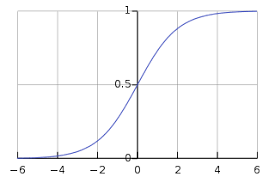
The sigmoid transformation generates a  smooth range of values between 0 and 1.We need to observe the changes in the output with slight changes in the input values.


In [8]:
tf.reset_default_graph()

num_periods = 100 # no of periods per vector
inputs = 1        # no of input vectors 
hidden = 400      # no of neurons that is recursively used to run
output = 1        # no of output vectors

# A placeholder exists solely to serve as the target of feeds
X = tf.placeholder(tf.float32, [None, num_periods, inputs]) 
y = tf.placeholder(tf.float32, [None, num_periods, output])

### COST FUNCTION

- When we build a network, the network tries to predict the output as close as possible to the actual value. We measure this accuracy of the network using the cost/loss function. The cost or loss function tries to penalize the network when it makes errors.

- Our objective while running the network is to increase our prediction accuracy and to reduce the error, hence minimizing the cost function. The most optimized output is the one with least value of the cost or loss function.

- Therefore we define the cost function to be the mean squared error, it can be written as –

- C= 1/m ∑(y – a)2 where m is the number of training inputs, a is the predicted value and y is the actual value of that particular example.
- The learning process revolves around minimizing the cost.

### GRADIENT DESCENT

- Gradient descent is an optimization algorithm for minimizing the cost. To think of it intuitively, while climbing down a hill you should take small steps and walk down instead of just jumping down at once. Therefore, what we do is, if we start from a point x, we move down a little i.e. delta h, and update our position to x-delta h and we keep doing the same till we reach the bottom. Consider bottom to be the minimum cost point.
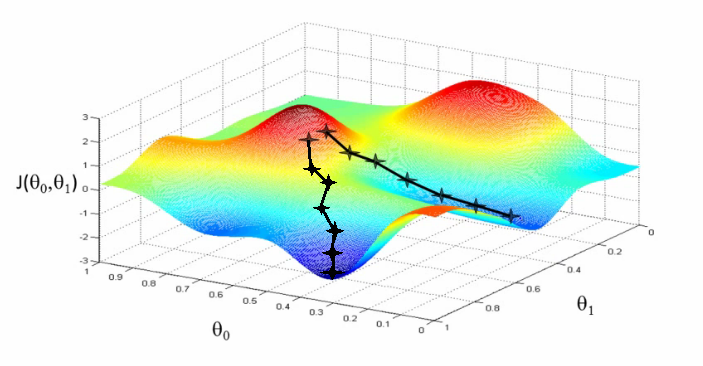

In [9]:
# Create RNN cell
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.sigmoid) # create our RNN object
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

#Define the Learning Rate
learning_rate = 0.001

#Define the denser layer and the shape of the results
stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden]) 
stacked_outputs = tf.layers.dense(stacked_rnn_output, output) 
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output]) 

#Define the cost function which evaluates the quality of our model
loss = tf.reduce_sum(tf.square(outputs - y)) 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) # gradient descent method
training_op = optimizer.minimize(loss) # train the result of the application of the cost_function

# initialize all the variables
init = tf.global_variables_initializer() 

- Learning Rate – The learning rate is defined as the amount of minimization in the cost function in each iteration. In simple terms, the rate at which we descend towards the minima of the cost function is the learning rate. We should choose the learning rate very carefully since it should neither be very large that the optimal solution is missed and nor should be very low that it takes forever for the network to converge.

- Epochs – An epoch is defined as a single training iteration of all batches in both forward and back propagation. This means 1 epoch is a single forward and backward pass of the entire input data. 
The number of epochs you would use to train your network can be chosen by you. It’s highly likely that more number of epochs would show higher accuracy of the network, however, it would also take longer for the network to converge. Also you must take care that if the number of epochs are too high, the network might be over-fit.

STEPS: 
- The output shows the MeanSquaredError after each 100 epochs.
- As the model feeds the data forward and backpropagation runs, it adjusts the weights applied to the inputs and runs another training epoch. 
- The MSE continues to improve (by decreasing).
- And finally, when the model is completed running, it takes the parameters and applies them to the test data to give us our predicted output for Y.

In [12]:
# Next we specify the number of iterations/epochs that will cycle through our batches of training sequences.
epochs = 1200

#We create our graph object (tf.Session()) and initialize our data to be fed into the model as we cycle through the epochs.
with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print('epochs:', ep, '\t Mean square error :', mse)
            
    y_predicted = sess.run(outputs, feed_dict={X: X_test})
    print(y_predicted)

epochs: 0 	 Mean square error : 4372.4766
epochs: 100 	 Mean square error : 89.16597
epochs: 200 	 Mean square error : 8.716949
epochs: 300 	 Mean square error : 1.6988822
epochs: 400 	 Mean square error : 1.4434634
epochs: 500 	 Mean square error : 1.4296805
epochs: 600 	 Mean square error : 1.4184045
epochs: 700 	 Mean square error : 1.406298
epochs: 800 	 Mean square error : 1.3934062
epochs: 900 	 Mean square error : 1.3797932
epochs: 1000 	 Mean square error : 1.3655303
epochs: 1100 	 Mean square error : 1.350694
[[[0.01588258]
  [0.01626334]
  [0.01568062]
  [0.01700694]
  [0.01524678]
  [0.01670297]
  [0.01572918]
  [0.01698921]
  [0.01620759]
  [0.01622151]
  [0.01686732]
  [0.01735288]
  [0.01589925]
  [0.01586364]
  [0.01762808]
  [0.0170118 ]
  [0.01620447]
  [0.01593032]
  [0.01622601]
  [0.01573564]
  [0.01590762]
  [0.01622759]
  [0.01551579]
  [0.01553048]
  [0.01652609]
  [0.0166556 ]
  [0.01576495]
  [0.01595359]
  [0.01574154]
  [0.01581513]
  [0.01622951]
  [0.016974

- From the obtained output the initial epochs have MSE at 110k.
- And at a later stage starts decreasing to reach at around 1.5 after 300 epochs.(Lesser the MSE better is the Model)

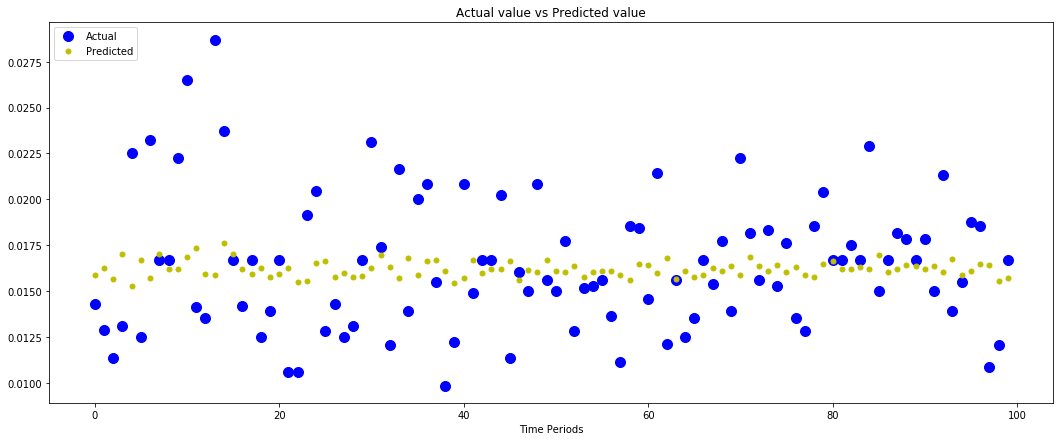

In [13]:
# plotting actual value vs Predicted value 
plt.figure(figsize=(18, 7))
plt.title('Actual value vs Predicted value', fontsize=12)
plt.plot(pd.Series(np.ravel(Y_test)), 'bo', markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_predicted)), 'y.', markersize=10, label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Time Periods')
plt.show()


### To improve the output of the model further we are tuning the hyperparameters to reach Optimization.

# # 2. Using Adam optimizer and RELU activation function 

- ReLU(Rectified Linear Units) – Instead of sigmoids, the recent networks prefer using ReLu activation functions for the hidden layers. The function is defined as:
f(x) = max(x,0).

The output of the function is X when X>0 and 0 for X<=0. The function looks like this:
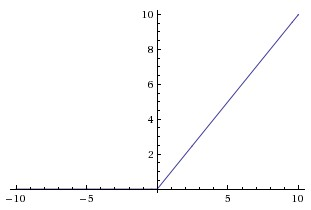

-The major benefit of using ReLU is that it has a constant derivative value for all inputs greater than 0. The constant derivative value helps the network to train faster.

In [14]:
tf.reset_default_graph()

num_periods = 100 # no of periods per vector
inputs = 1        # no of input vectors 
hidden = 400     # no of neurons that is recursively used to run
output = 1        # no of output vectors

# A placeholder exists solely to serve as the target of feeds
X = tf.placeholder(tf.float32, [None, num_periods, inputs]) 
y = tf.placeholder(tf.float32, [None, num_periods, output])

In [15]:
# Create RNN cell with Relu as the Activation function
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

#Define the Learning Rate
learning_rate = 0.001

#Define the denser layer and the shape of the results
stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden]) 
stacked_outputs = tf.layers.dense(stacked_rnn_output, output) 
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output]) 

#Define the cost function which evaluates the quality of our model
loss = tf.reduce_sum(tf.square(outputs - y)) 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) # gradient descent method
training_op = optimizer.minimize(loss) # train the result of the application of the cost_function

# initialize all the variables
init = tf.global_variables_initializer() 

In [16]:
# Next we specify the number of iterations/epochs that will cycle through our batches of training sequences.
epochs = 1200

#We create our graph object (tf.Session()) and initialize our data to be fed into the model as we cycle through the epochs.
with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print('epochs:', ep, '\t Mean square error :', mse)
            
    y_predicted = sess.run(outputs, feed_dict={X: X_test})
    print(y_predicted)

epochs: 0 	 Mean square error : 1.3343902
epochs: 100 	 Mean square error : 0.7299266
epochs: 200 	 Mean square error : 0.7262801
epochs: 300 	 Mean square error : 0.719684
epochs: 400 	 Mean square error : 0.7167196
epochs: 500 	 Mean square error : 0.72778696
epochs: 600 	 Mean square error : 0.7140731
epochs: 700 	 Mean square error : 0.815748
epochs: 800 	 Mean square error : 0.73575175
epochs: 900 	 Mean square error : 0.71159625
epochs: 1000 	 Mean square error : 0.7193959
epochs: 1100 	 Mean square error : 0.7087971
[[[0.01560343]
  [0.01544717]
  [0.01414648]
  [0.01366849]
  [0.01338153]
  [0.01470547]
  [0.01406557]
  [0.01512389]
  [0.01507451]
  [0.01539394]
  [0.01620132]
  [0.01739335]
  [0.0169555 ]
  [0.01675903]
  [0.01792065]
  [0.01824955]
  [0.01836745]
  [0.01794419]
  [0.01757191]
  [0.01675481]
  [0.01642901]
  [0.01638953]
  [0.01563315]
  [0.01504354]
  [0.01537562]
  [0.01599031]
  [0.01579192]
  [0.01569524]
  [0.01518721]
  [0.01489841]
  [0.01506728]
  [0.0

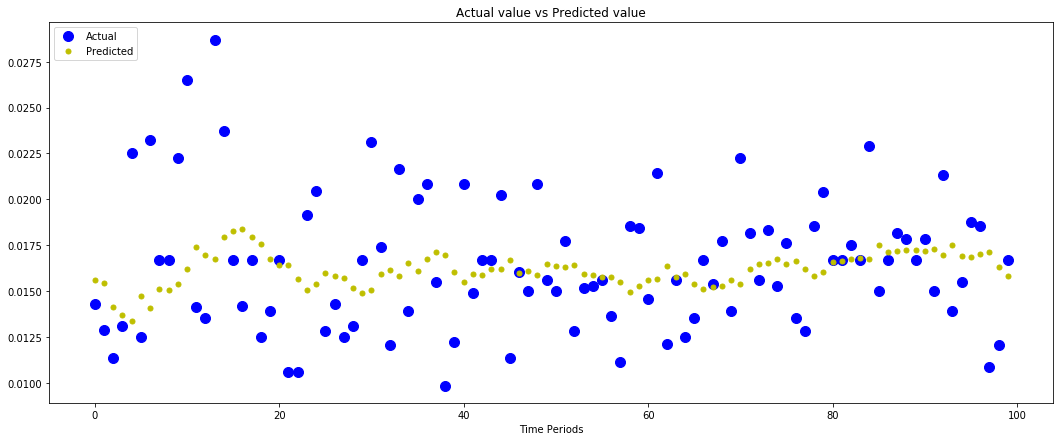

In [17]:
# plotting actual value vs Predicted value 
plt.figure(figsize=(18, 7))
plt.title('Actual value vs Predicted value', fontsize=12)
plt.plot(pd.Series(np.ravel(Y_test)), 'bo', markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_predicted)), 'y.', markersize=10, label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Time Periods')
plt.show()


## 2. Using Adadelta optimizer and RELU activation function  

- Adadelta is a gradient descent based learning algorithm that adapts the learning rate per parameter over time. It was proposed as an improvement over Adagrad, which is more sensitive to hyperparameters and may decrease the learning rate too aggressively.
- Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated past gradients to some fixed size w.
- Instead of inefficiently storing w previous squared gradients, the sum of gradients is recursively defined as a decaying average of all past squared gradients. 

In [18]:
tf.reset_default_graph()

num_periods = 100 # no of periods per vector
inputs = 1        # no of input vectors 
hidden = 400      # no of neurons that is recursively used to run
output = 1        # no of output vectors

# A placeholder exists solely to serve as the target of feeds
X = tf.placeholder(tf.float32, [None, num_periods, inputs]) 
y = tf.placeholder(tf.float32, [None, num_periods, output])

In [19]:
# Create RNN cell with Relu as the Activation function
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

#Define the Learning Rate
learning_rate = 0.001

#Define the denser layer and the shape of the results
stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden]) 
stacked_outputs = tf.layers.dense(stacked_rnn_output, output) 
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output]) 

#Define the cost function which evaluates the quality of our model
loss = tf.reduce_sum(tf.square(outputs - y)) 
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate) # gradient descent method
training_op = optimizer.minimize(loss) # train the result of the application of the cost_function

# initialize all the variables
init = tf.global_variables_initializer() 

In [20]:
# Next we specify the number of iterations/epochs that will cycle through our batches of training sequences.
epochs = 1200

#We create our graph object (tf.Session()) and initialize our data to be fed into the model as we cycle through the epochs.
with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print('epochs:', ep, '\t Mean square error :', mse)
            
    y_predicted = sess.run(outputs, feed_dict={X: X_test})
    print(y_predicted)

epochs: 0 	 Mean square error : 15.904995
epochs: 100 	 Mean square error : 14.039953
epochs: 200 	 Mean square error : 2.045372
epochs: 300 	 Mean square error : 1.4132729
epochs: 400 	 Mean square error : 1.2698185
epochs: 500 	 Mean square error : 1.1694708
epochs: 600 	 Mean square error : 1.0623267
epochs: 700 	 Mean square error : 0.92840815
epochs: 800 	 Mean square error : 0.8153745
epochs: 900 	 Mean square error : 0.82115245
epochs: 1000 	 Mean square error : 0.8034524
epochs: 1100 	 Mean square error : 0.79461277
[[[0.01366594]
  [0.01597952]
  [0.01574923]
  [0.01579632]
  [0.01548978]
  [0.01564165]
  [0.01644382]
  [0.01712739]
  [0.01725613]
  [0.01749297]
  [0.01751336]
  [0.01867543]
  [0.01911304]
  [0.01896054]
  [0.01869245]
  [0.01967606]
  [0.02043768]
  [0.0201114 ]
  [0.01936986]
  [0.01861265]
  [0.01814864]
  [0.01777043]
  [0.01729926]
  [0.01646974]
  [0.01601743]
  [0.0163985 ]
  [0.01677937]
  [0.01666511]
  [0.01610894]
  [0.01561318]
  [0.01560253]
  [0.

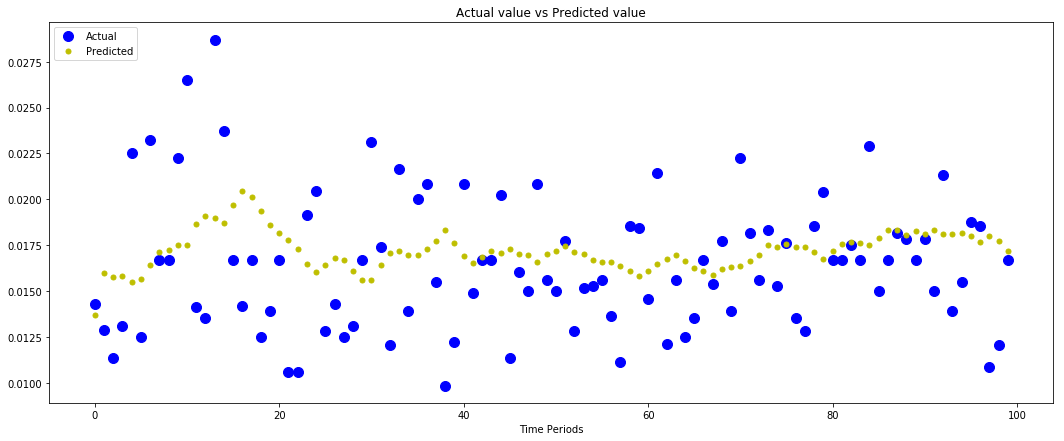

In [21]:
# plotting actual value vs Predicted value 
plt.figure(figsize=(18, 7))
plt.title('Actual value vs Predicted value', fontsize=12)
plt.plot(pd.Series(np.ravel(Y_test)), 'bo', markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_predicted)), 'y.', markersize=10, label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Time Periods')
plt.show()

- Therefore the best hyperparameter configuration is when we configure with | (100 - periods per vector)| (1 - input vector)|(500 - hidden layers of neurons) | (1 - output vector) | (Activation function - ReLU) | (Learning rate - 0.001) | (Loss function -  MSE) | (Gradient estimation -  Adam Optimizer) 
- Using the above configuration we are able to achieve lower mean squared error and aslo We can see that the initial epochs have a higher MSE and then slowly it decreases after certain epochs.
- And thus when we check our predicted versus actual values we can see that we are able to achieve better results using the above configuration.